<a href="https://colab.research.google.com/github/Nail-thedata/Car_Market_Data_Analysis_and_Prediction/blob/main/Car_Market_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nail Senbas - Car Price Data Analysis and Price Prediction Model

*   Exploratory Data Analysis (EDA)
*   Data Cleaning and Manipulation
*   Data Analysis
*   Statistical Tests
*   Linear Prediction Model
*   Error Handling
*   Model Pipeline
*   Visualization
*   Uploading model to AWS Cloud








## Uploading necessary libraries and dataset

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [246]:
#Importing dataset from Github
car_price_data_orj= pd.read_csv(r"https://raw.githubusercontent.com/Nail-thedata/Car_Market_Data_Analysis_and_Prediction/main/car_price_data.csv")

In [247]:
#Print the dataset
car_price_data_orj

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845.00
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.00
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470.00


In [248]:
#Copy orjinal data to another dataframe that is for data manipulation and to recover if it necessary
car_price_data=car_price_data_orj.copy()

# **Data Cleaning & Manipulation**

In [249]:
#Setting 'car_ID' as index of dataframe
car_price_data.set_index('car_ID',inplace=True)

In [250]:
car_price_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10,188.80,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845.00
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10,188.80,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.00
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10,188.80,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00


In [251]:
#Another backup for further progress
car_price_data_backup=car_price_data_orj.copy()


What does the dataset look like? How many records & features are there?

In [252]:
car_price_data.shape
print("Car_price_data contains", car_price_data.shape[0], "examples with" ,car_price_data.shape[1], "features")


Car_price_data contains 205 examples with 25 features


Which data types do exist in dataset?

In [253]:
#Discover the data types in dataset
car_price_data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [254]:
#Show only 'object' types features in dataset
car_price_data.select_dtypes(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
201,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
203,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi


In [255]:
#It is a numerical variable and should be converted
car_price_data["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [256]:
#Replace number of doors as integer
car_price_data["doornumber"].replace({'two':int(2),'four':int(4)},inplace=True)
car_price_data["doornumber"]

car_ID
1      2
2      2
3      2
4      4
5      4
      ..
201    4
202    4
203    4
204    4
205    4
Name: doornumber, Length: 205, dtype: int64

In [257]:
#It is a numerical variable and should be converted
car_price_data["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [258]:
#Replace cylinder numbers as integer
car_price_data["cylindernumber"].replace({'two':int(2),'three':int(3),'four':int(4),'five':int(5),'six':int(6),'eight':int(8),'twelve':int(12)},inplace=True)

In [259]:
car_price_data["cylindernumber"].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

Other features are categorical variables and should be "category" type instead of object

In [260]:
car_price_data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [261]:
#Select only 'object' type features
car_price_data.select_dtypes(include="object")

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
car_ID,,,,,,,,
1,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
3,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
4,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
5,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
201,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi
202,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi
203,volvo 244dl,gas,std,sedan,rwd,front,ohcv,mpfi


In [262]:
#Change 'object' type features to 'category'
object_columns = car_price_data.select_dtypes(include=['object']).columns
car_price_data[object_columns] = car_price_data[object_columns].astype('category')

**About Data Types**


Identifying the correct data types is crucial for general purposes.
Recognizing whether data is categorical or another type serves as a directive for software, guiding the execution of statistical processes, such as generating charts or modeling.This not only optimizes storage and indexing but also prevents unexpected or undesirable outcomes during data manipulation.

In [263]:
car_price_data.dtypes

symboling              int64
CarName             category
fueltype            category
aspiration          category
doornumber             int64
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber         int64
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
dtype: object

In [264]:
#Updating backup for next steps
car_price_data_backup=car_price_data.copy()



---


What are the summary statistics for the numerical variables?


In [265]:
car_price_data.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,3.12,98.76,174.05,65.91,53.72,2555.57,4.38,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,0.99,6.02,12.34,2.15,2.44,520.68,1.08,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,2.00,86.60,141.10,60.30,47.80,1488.00,2.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,2.00,94.50,166.30,64.10,52.00,2145.00,4.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,4.00,97.00,173.20,65.50,54.10,2414.00,4.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,4.00,102.40,183.10,66.90,55.50,2935.00,4.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,4.00,120.90,208.10,72.30,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [266]:
#Get a simpler format to examine numerical values
pd.set_option('display.float_format', '{:.2f}'.format)

In [267]:
car_price_data.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,3.12,98.76,174.05,65.91,53.72,2555.57,4.38,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,0.99,6.02,12.34,2.15,2.44,520.68,1.08,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,2.00,86.60,141.10,60.30,47.80,1488.00,2.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,2.00,94.50,166.30,64.10,52.00,2145.00,4.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,4.00,97.00,173.20,65.50,54.10,2414.00,4.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,4.00,102.40,183.10,66.90,55.50,2935.00,4.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,4.00,120.90,208.10,72.30,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00




---


How many car brands are there within the dataset?



In [268]:
car_price_data["CarName"]

car_ID
1            alfa-romero giulia
2           alfa-romero stelvio
3      alfa-romero Quadrifoglio
4                   audi 100 ls
5                    audi 100ls
                 ...           
201             volvo 145e (sw)
202                 volvo 144ea
203                 volvo 244dl
204                   volvo 246
205                 volvo 264gl
Name: CarName, Length: 205, dtype: category
Categories (147, object): ['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
                           'alfa-romero stelvio', ..., 'volvo 264gl', 'volvo diesel', 'vw dasher',
                           'vw rabbit']

The brand and model names are written together in "CarName" column.
As recognized pattern, the first part of string is brand name and second part is model name.

In [269]:
#Split "CarName" into Brand and Model
car_price_data["CarName"].str.split(expand=True)

,0,1,2,3,4
car_ID,,,,,
1,alfa-romero,giulia,None,None,None
2,alfa-romero,stelvio,None,None,None
3,alfa-romero,Quadrifoglio,None,None,None
4,audi,100,ls,None,None
5,audi,100ls,None,None,None
...,...,...,...,...,...
201,volvo,145e,(sw),None,None
202,volvo,144ea,None,None,None
203,volvo,244dl,None,None,None


In [270]:
#Save brands from "CarName"
brands= car_price_data["CarName"].str.split(expand=True)

In [271]:
#Show brands
brands.loc[:,0].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [272]:
#Number of unique brands in dataset
brands.loc[:,0].nunique()

28

In [273]:
#Sort brands in respect of frequency
brands.loc[:,0].value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: 0, dtype: int64

It seems that there are some alternative or typos in brand names like toyota as toyouta, porsche as porcshce,mazda as maxda, volkswagen as vokswagen or vw, Nissan as nissan.
So there are 6 additional brand names which are already counted.

In [274]:
#Another backup for further steps
car_price_data_backup=car_price_data.copy()

In [275]:
#Create new features as "Brand" and "Model" of cars for analysis
car_price_data["Brand"]= car_price_data["CarName"].str.split(expand=True)[0]
car_price_data["Model"]= car_price_data["CarName"].str.split(expand=True)[1]

In [276]:
car_price_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Brand',
       'Model'],
      dtype='object')

In [277]:
#Re-order features to place 'Brand' and 'Model' in second and third columns
columns=['symboling','Brand',
       'Model', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
car_price_data=car_price_data[columns]

In [278]:
#check if manipulation is done correctly
car_price_data

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,alfa-romero giulia,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero,stelvio,alfa-romero stelvio,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero,Quadrifoglio,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi,100,audi 100 ls,gas,std,4,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi,100ls,audi 100ls,gas,std,4,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo,145e,volvo 145e (sw),gas,std,4,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845.00
202,-1,volvo,144ea,volvo 144ea,gas,turbo,4,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.00
203,-1,volvo,244dl,volvo 244dl,gas,std,4,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00


In [279]:
car_price_data_backup=car_price_data.copy()

In [280]:
#Assign correct data type to new features "Brand" and "Model"
car_price_data[["Brand","Model"]]=car_price_data[["Brand","Model"]].astype('category')

In [281]:
#Examine categorical variables in dataset
car_price_data.describe(include='category')

,Brand,Model,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
count,205,203,205,205,205,205,205,205,205,205
unique,28,114,147,2,2,5,3,2,7,8
top,toyota,corolla,peugeot 504,gas,std,sedan,fwd,front,ohc,mpfi
freq,31,12,6,185,168,96,120,202,148,94


In [282]:
#Sort "Brand" names to review what we have here
car_price_data["Brand"].value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: Brand, dtype: int64

In [283]:
#Brand names are replaced with correct names and avoid duplicates
car_price_data["Brand"].replace({'Nissan': str('nissan'),'alfa-romero': str('alfa-romeo'),
                                  'maxda':str("mazda"),'porcshce':str("porsche"),
                                  'toyouta':str("toyota"), 'vokswagen':str("volkswagen"),
                                    'vw':str("volkswagen")},inplace=True)

In [284]:
#Check for manipulation
car_price_data["Brand"].value_counts().sort_index()

alfa-romeo     3
audi           7
bmw            8
buick          8
chevrolet      3
dodge          9
honda         13
isuzu          4
jaguar         3
mazda         17
mercury        1
mitsubishi    13
nissan        18
peugeot       11
plymouth       7
porsche        5
renault        2
saab           6
subaru        12
toyota        32
volkswagen    12
volvo         11
Name: Brand, dtype: int64

In [285]:
#Number of unique Brands in our dataset
real_brand_number=car_price_data["Brand"].nunique()
print("The number of brands is",real_brand_number,"within dataset")

The number of brands is 22 within dataset


In [286]:
car_price_data[car_price_data["Brand"]=="alfa-romeo"]["Model"]

car_ID
1          giulia
2         stelvio
3    Quadrifoglio
Name: Model, dtype: category
Categories (114, object): ['100', '100ls', '1131', '12tl', ..., 'xf', 'xj', 'xk', 'z4']

In [287]:
#Check models in each brand and it could be corrected for each brand and models for further manipulation
car_price_data.groupby(["Brand"])["Model"].unique()

Brand
alfa-romeo    ['giulia', 'stelvio', 'Quadrifoglio']
Categori...
audi          ['100', '100ls', 'fox', '5000', '4000', '5000s...
bmw           ['320i', 'x1', 'x3', 'z4', 'x4', 'x5']
Categor...
buick         ['electra', 'century', 'skyhawk', 'opel', 'sky...
chevrolet     ['impala', 'monte', 'vega']
Categories (114, o...
dodge         ['rampage', 'challenger', 'd200', 'monaco', 'c...
honda         ['civic', 'accord', 'prelude']
Categories (114...
isuzu         ['MU-X', 'D-Max']
Categories (114, object): ['...
jaguar        ['xj', 'xf', 'xk']
Categories (114, object): [...
mazda         ['rx3', 'glc', 'rx2', 'rx-4', '626', 'rx-7']
C...
mercury       ['cougar']
Categories (114, object): ['100', '...
mitsubishi    ['mirage', 'lancer', 'outlander', 'g4', 'monte...
nissan        ['versa', 'gt-r', 'rogue', 'latio', 'titan', ....
peugeot       ['504', '304', '604sl', '505s']
Categories (11...
plymouth      ['fury', 'cricket', 'satellite', 'valiant', 'd...
porsche       ['macan', 'panamera'

Are there any missing values?

In [288]:
#Searching for missing data
car_price_data.isnull().sum()

symboling           0
Brand               0
Model               2
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [289]:
#Detect the missing value
car_price_data[car_price_data["Model"].isnull()==True]

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
139,2,subaru,NaN,subaru,gas,std,2,hatchback,fwd,front,...,97,2bbl,3.62,2.36,9.00,69,4900,31,36,5118.00
142,0,subaru,NaN,subaru,gas,std,4,sedan,fwd,front,...,108,2bbl,3.62,2.64,9.50,82,4800,32,37,7126.00


In [290]:
car_price_data_backup=car_price_data.copy()

These 2 missing values have occured through data cleaning and processing part but originally there were no missing values.
It may be dropped them or write 'subaru' again for sake of preserve examples.

In [291]:
#To add any new model in "Model" feature, it has to registered in available categories
car_price_data["Model"]=car_price_data["Model"].cat.add_categories("subaru")

In [292]:
#Add brand name of car to "Model" part to get rid of Nan value
car_price_data.loc[139,"Model"]="subaru"
car_price_data.loc[142,"Model"]="subaru"

In [293]:
#Final check if manipulation is done right
car_price_data[car_price_data["Model"].isnull()==True]

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,


It seems there is no other missing value in dataset. However, sometimes datasets may have different values or strings such as impossible value for particular feature or strings which indicates missing value rather than 'NaN'.
Any suspicious value does not appear in 'describe' part.

I have checked the unique values in features by the following code if there is any kind of that case.

In [294]:
car_price_data[[car_price_data.columns[15]]].value_counts()

enginetype
ohc           148
ohcf           15
ohcv           13
dohc           12
l              12
rotor           4
dohcv           1
dtype: int64

## Exploratory Data Analysis

In [295]:
#check Data types in dataset
car_price_data.dtypes

symboling              int64
Brand               category
Model               category
CarName             category
fueltype            category
aspiration          category
doornumber             int64
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber         int64
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
dtype: object

In [296]:
#Quantitative analysis on numerical variable on dataset
car_price_data.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,3.12,98.76,174.05,65.91,53.72,2555.57,4.38,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,0.99,6.02,12.34,2.15,2.44,520.68,1.08,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,2.00,86.60,141.10,60.30,47.80,1488.00,2.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,2.00,94.50,166.30,64.10,52.00,2145.00,4.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,4.00,97.00,173.20,65.50,54.10,2414.00,4.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,4.00,102.40,183.10,66.90,55.50,2935.00,4.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,4.00,120.90,208.10,72.30,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


After examining, it seems that there is no unreasonable or outlier value in the numerical features

Categorical Variables

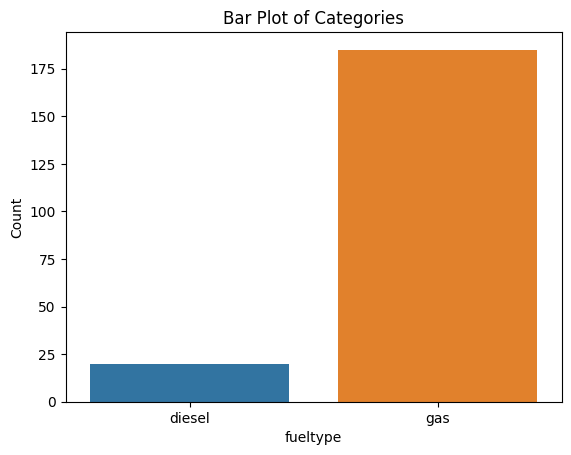

In [297]:
categorical_variable= car_price_data

# Count the occurrences of each category and create a bar plot
sns.countplot(x='fueltype', data=categorical_variable)
plt.xlabel('fueltype')
plt.ylabel('Count')
plt.title('Bar Plot of Categories')
plt.show()


In [298]:
categorical_variables= car_price_data.select_dtypes(include="category").columns
categorical_variables

Index(['Brand', 'Model', 'CarName', 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [299]:
car_price_data[categorical_variables]

,Brand,Model,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
car_ID,,,,,,,,,,
1,alfa-romeo,giulia,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romeo,stelvio,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
3,alfa-romeo,Quadrifoglio,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
4,audi,100,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
5,audi,100ls,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...,...,...
201,volvo,145e,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi
202,volvo,144ea,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi
203,volvo,244dl,volvo 244dl,gas,std,sedan,rwd,front,ohcv,mpfi


In [300]:
categorical_variables= car_price_data.select_dtypes(include="category").columns
for i in categorical_variables:
    print(i)

Brand
Model
CarName
fueltype
aspiration
carbody
drivewheel
enginelocation
enginetype
fuelsystem


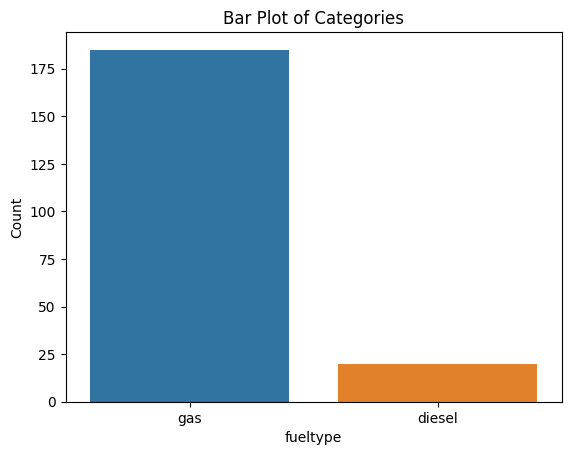

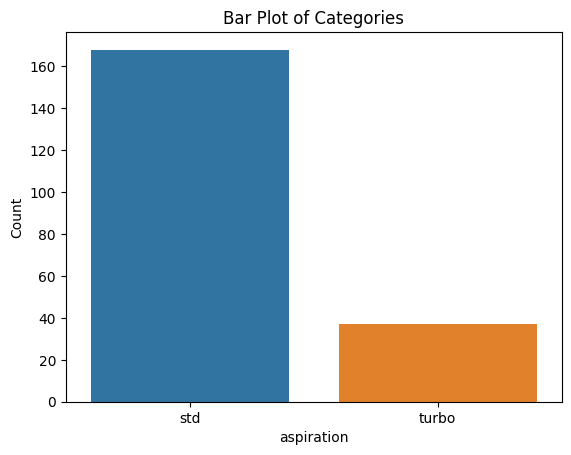

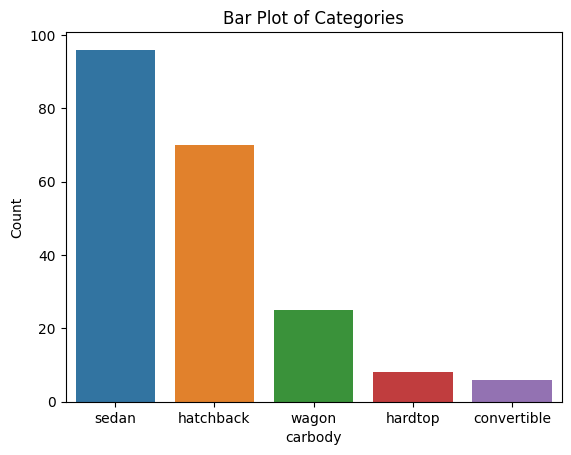

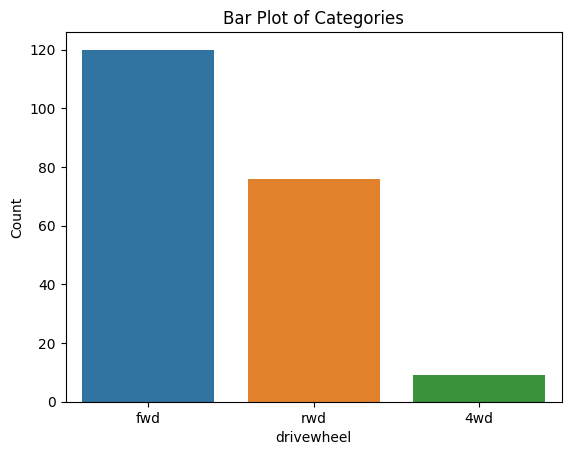

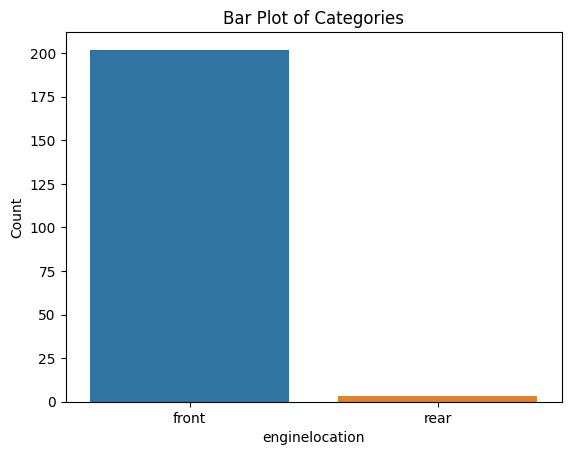

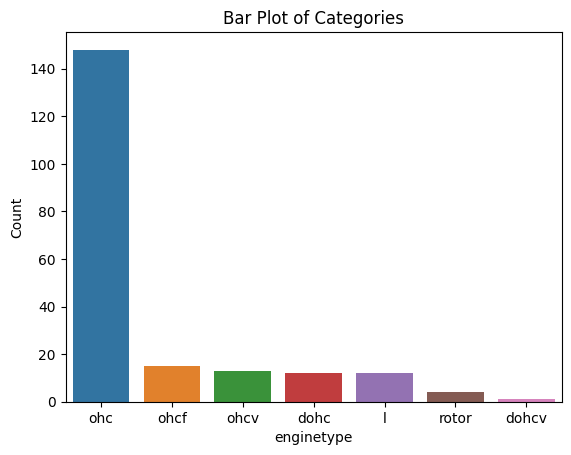

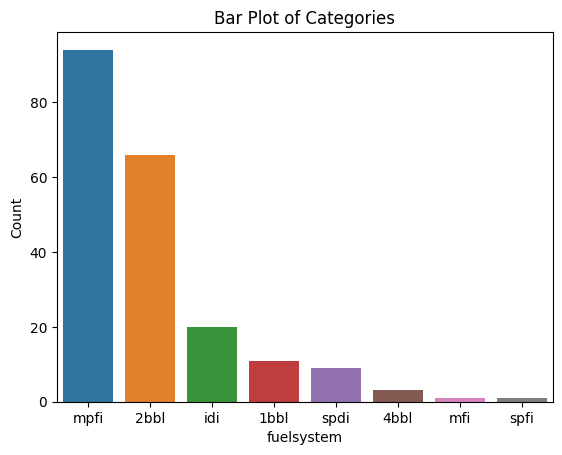

In [301]:
categorical_variables= car_price_data.select_dtypes(include="category").columns
categorical_variables= categorical_variables.drop(["CarName","Brand","Model"])
for i in categorical_variables:
    sns.countplot(x=str(i), data=car_price_data[categorical_variables] ,order=car_price_data[str(i)].value_counts().index)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Bar Plot of Categories')
    plt.show()

**Dominantly most frequent features of cars:**
*   Gasoline for fueltype
*   Standard aspiration
*   Engine location is front
*   'ohc' for engine type
*   'mpfi' and '2bbl' for fuel system











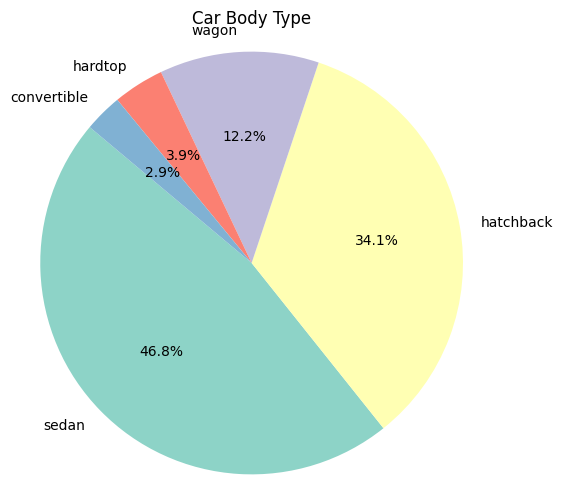

In [302]:

# Count the occurrences of each category
category_counts = car_price_data['carbody'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Car Body Type')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


One of critical choice is to select most popular carbody for manufacturing.

Data shows that two significant car body type are sedan and hatchback those more than 80% of available cars in dataset.

**Distribution of Car Price**

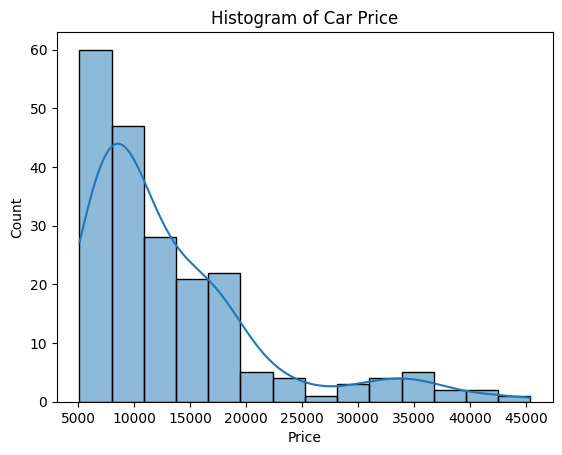

In [303]:
#Histogram of Car Prices
sns.histplot(car_price_data['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Car Price')
plt.show()


Car Price distributon is highly right skewed and it means that majority of available cars have low prices and the number of available cars is decreasing dramatically as price increases.

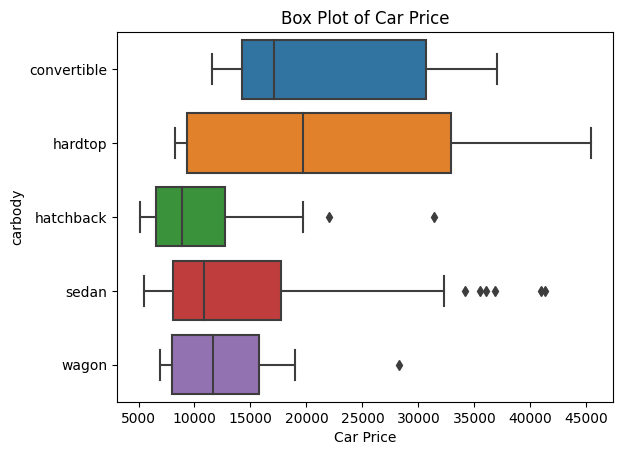

In [304]:
sns.boxplot(x=car_price_data['price'],y=car_price_data["carbody"])
plt.xlabel('Car Price')
plt.title('Box Plot of Car Price')
plt.show()


When the price distribuiton compared to car body classes, the cars which have convertible and hardtop body have wide range spread in price. As 80% of cars have hatchback and sedan body, both are have lower prices. Interesting thing is that sedan body has wider available range in price but hatchback has not, where price comes very competitive in the market for this type of body.

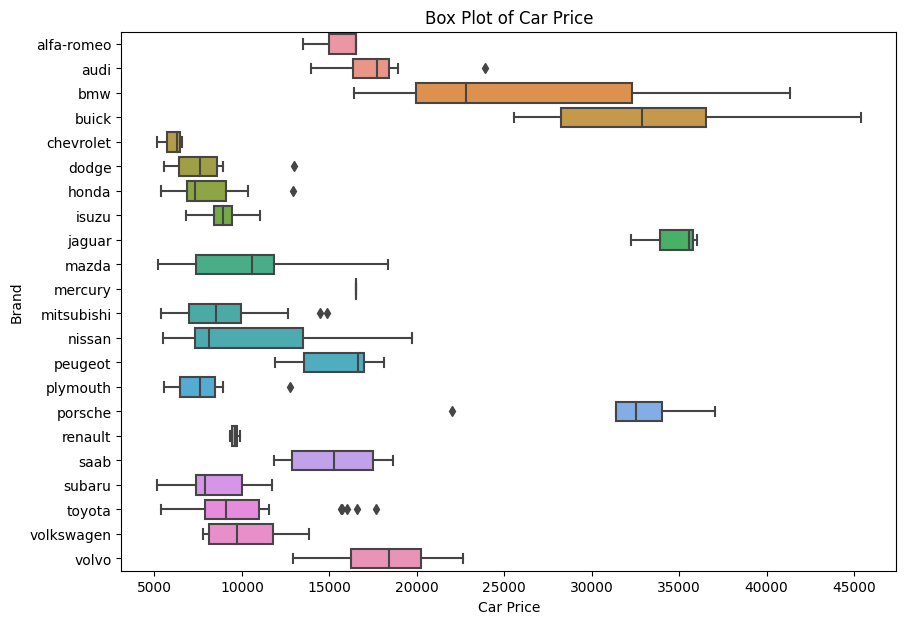

In [305]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=car_price_data['price'],y=car_price_data["Brand"])

plt.xlabel('Car Price')
plt.title('Box Plot of Car Price')
plt.show()

This plot clearly shows that market demand is high on cars which are cheaper and most of brands are focused on manufacturing cars having prices up to approx. 20,000 USD. There is strict limit about 20,000 USD and after this limit, there are only 4 brands manufacturing luxury cars. Any new company should determine the price or cost of their cars considering the market limit and which category they would enter the market.

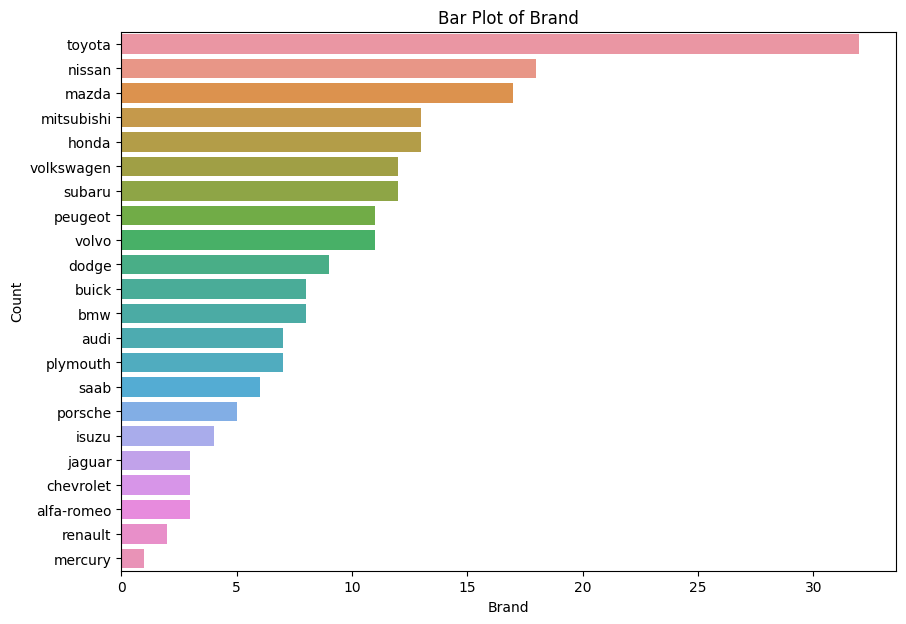

In [306]:
plt.figure(figsize=(10,7))
sns.countplot(y='Brand', data=car_price_data, order=car_price_data["Brand"].value_counts().index)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Bar Plot of Brand')
plt.show()

As it shows, toyota has the top manufacturer in the market.
Nissan, Mazda follows the leader as having half number of Toyota.

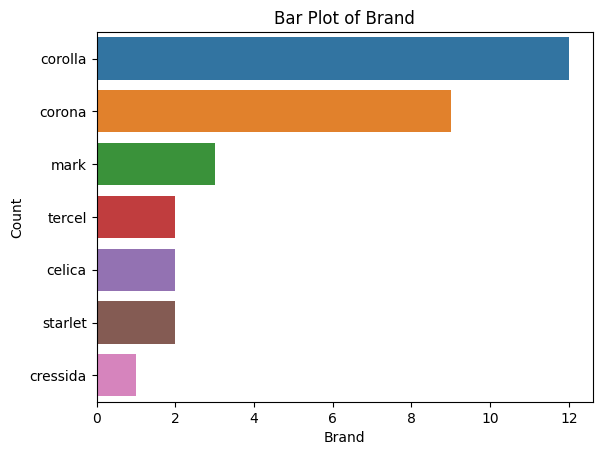

In [307]:
sns.countplot(y=car_price_data[car_price_data["Brand"]=="toyota"]["Model"], data=car_price_data, order=car_price_data[car_price_data["Brand"]=="toyota"]["Model"].value_counts().iloc[:7].index)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Bar Plot of Brand')
plt.show()

Corolla and Corona are the most chosen ones among models of Toyota.

Note: There is no typo in 'Corona'. It really exists as a car model of Toyota :)

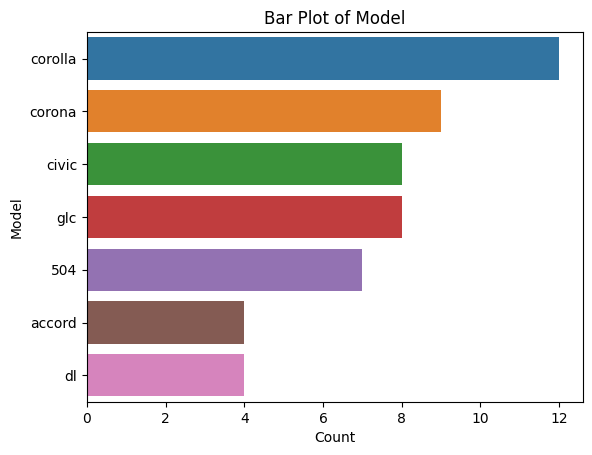

In [308]:
sns.countplot(y=car_price_data["Model"], data=car_price_data, order=car_price_data["Model"].value_counts().iloc[:7].index)
plt.xlabel('Count')
plt.ylabel('Model')
plt.title('Bar Plot of Model')
plt.show()

This visual supports that Corollo and Corona are the most desired cars among all models

**Takeaways:**

In very competitive price area, Toyota has dominant position in number of cars.

It is **strongly recommended** to investigate some of most chosen Toyota models what makes difference in attraction to customers.


## **Feature Selection**

In [309]:
car_price_data.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,3.12,98.76,174.05,65.91,53.72,2555.57,4.38,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,0.99,6.02,12.34,2.15,2.44,520.68,1.08,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,2.00,86.60,141.10,60.30,47.80,1488.00,2.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,2.00,94.50,166.30,64.10,52.00,2145.00,4.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,4.00,97.00,173.20,65.50,54.10,2414.00,4.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,4.00,102.40,183.10,66.90,55.50,2935.00,4.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,4.00,120.90,208.10,72.30,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [310]:
car_price_data.dtypes

symboling              int64
Brand               category
Model               category
CarName             category
fueltype            category
aspiration          category
doornumber             int64
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber         int64
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
dtype: object

In [311]:
#Selecting numerical variables
car_price_data_numeric= car_price_data.select_dtypes(exclude='category')
car_price_data_numeric

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,
1,3,2,88.60,168.80,64.10,48.80,2548,4,130,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,2,88.60,168.80,64.10,48.80,2548,4,130,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,2,94.50,171.20,65.50,52.40,2823,6,152,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,4,99.80,176.60,66.20,54.30,2337,4,109,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,4,99.40,176.60,66.40,54.30,2824,5,136,3.19,3.40,8.00,115,5500,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,4,109.10,188.80,68.90,55.50,2952,4,141,3.78,3.15,9.50,114,5400,23,28,16845.00
202,-1,4,109.10,188.80,68.80,55.50,3049,4,141,3.78,3.15,8.70,160,5300,19,25,19045.00
203,-1,4,109.10,188.80,68.90,55.50,3012,6,173,3.58,2.87,8.80,134,5500,18,23,21485.00


### **Correlation Matrix**

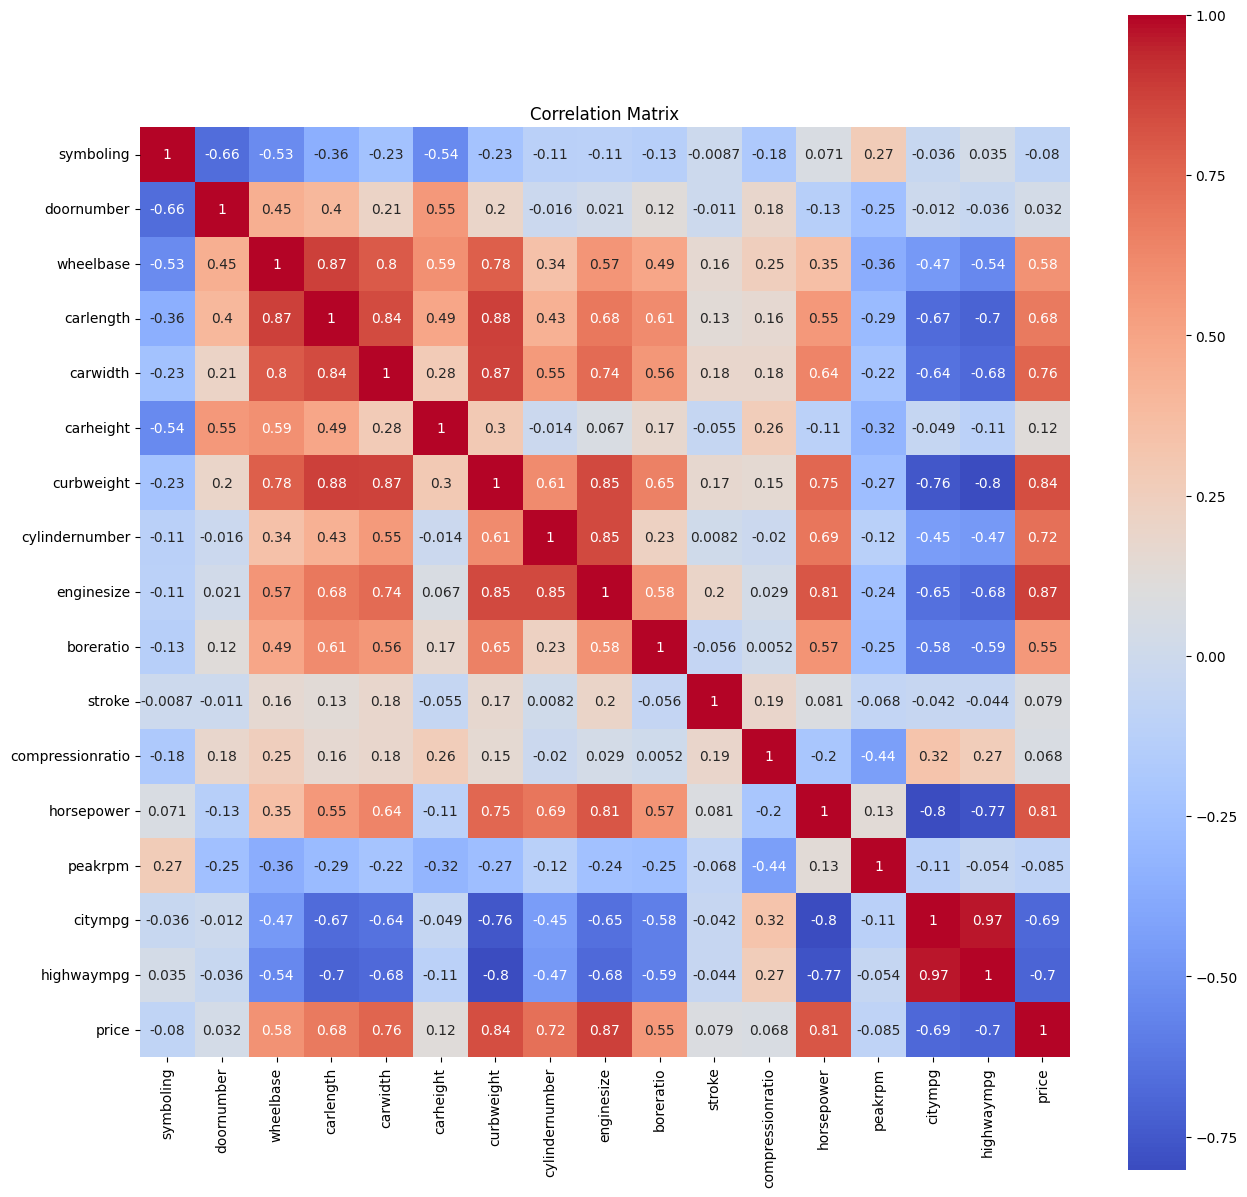

In [312]:
# Calculate the correlation matrix
correlation_matrix = car_price_data_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


**Focusing on target variable 'price'**

high positive correlation with price:

*   enginesize
*   curbweight
*   horsepower
*   carwidth
*   cylindernumber






High negative correlation with 'price':


*   citympg
*   highwaympg



Slightly positive correlation with 'price':


*   carlength
*   wheelbase,
*   boreratio





Whether positive or negative, high correlation indicates that these variables have major impact on price regarding linear correlation (relationship). They will be helpful and good explanatory variables in multilinear regression model.

However, the following features have very low correlation with 'price':


*   symboling
*   doornumber
*   carheight
*   stroke
*   compression ratio
*   peakrpm



It indicates that these features have minimal impact on car price's and excluding them would be reasonable action for model

In [313]:
selected_features= ["enginesize","curbweight","horsepower","carwidth","cylindernumber","carlength","wheelbase","boreratio","citympg", "highwaympg","price"]
car_price_data_numeric[selected_features]

,enginesize,curbweight,horsepower,carwidth,cylindernumber,carlength,wheelbase,boreratio,citympg,highwaympg,price
car_ID,,,,,,,,,,,
1,130,2548,111,64.10,4,168.80,88.60,3.47,21,27,13495.00
2,130,2548,111,64.10,4,168.80,88.60,3.47,21,27,16500.00
3,152,2823,154,65.50,6,171.20,94.50,2.68,19,26,16500.00
4,109,2337,102,66.20,4,176.60,99.80,3.19,24,30,13950.00
5,136,2824,115,66.40,5,176.60,99.40,3.19,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...
201,141,2952,114,68.90,4,188.80,109.10,3.78,23,28,16845.00
202,141,3049,160,68.80,4,188.80,109.10,3.78,19,25,19045.00
203,173,3012,134,68.90,6,188.80,109.10,3.58,18,23,21485.00


The threshold correlation value is selected as 0.75, and the following questions are investigated in next steps:

-Which variables should be include in the model?

-Are there any variable pairs that might be affected by multicollinearity?

-If so, how should it be dealt with this issue?

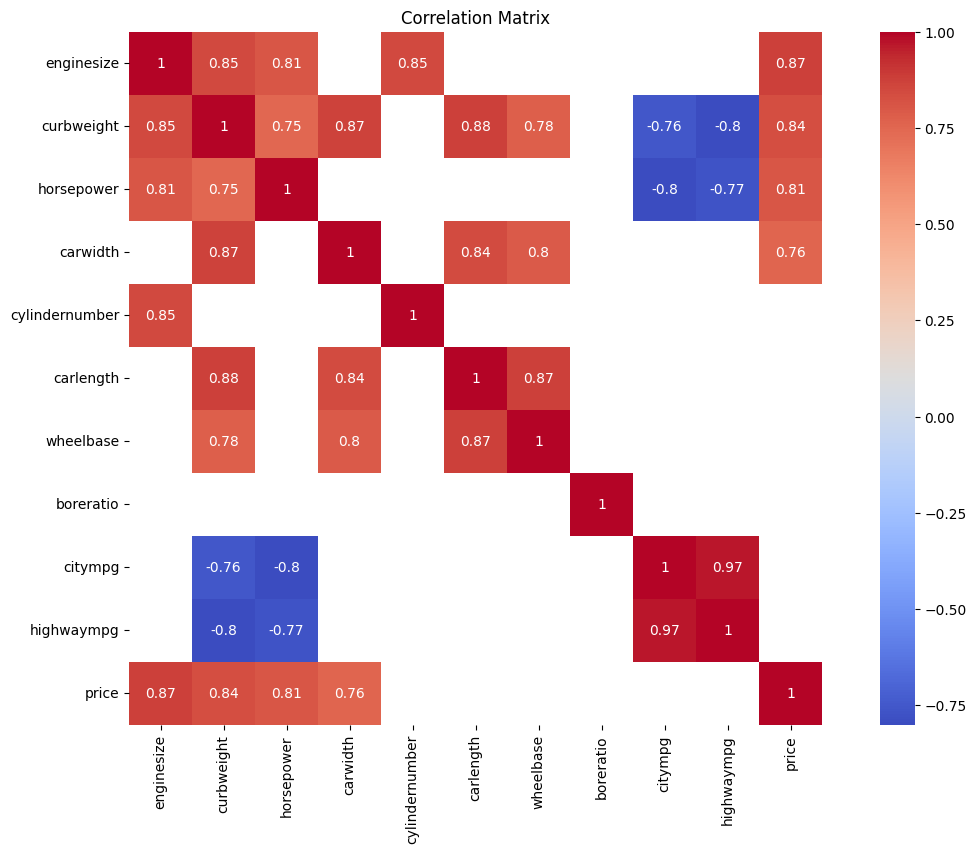

In [314]:
# Calculate the correlation matrix
correlation_matrix = car_price_data_numeric[selected_features].corr()
high_correlation=correlation_matrix[correlation_matrix.abs()>0.75]
# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### **Interpretation and Comments**

There is multicollinearity problem. The high correlation between enginesize, horsepower, curbweight is meaningful due to the nature of physics and car design. Generally when engine size increases, it creates more horsepower which is the total energy created by automobile engine and reasonably more powerful cars are designed with higher curb weight for carrying heavier motors and also safety. The options to solve muilticollinearity are to removing some of them or transforming them. Engine size has most correlation value as 0.87 among these. In this case, cars generally identified with their engine size at first, goes with horsepower and very seldom with curb weight. Engine size is the best feature that gives more impact one price and also good identifier for car. Cylinder number has 0.85 correlation with engine size so it will be removed too.

Other multicolinearity situation is between car width, car length, wheel base. It is also understandable that bigger cars like suv or sedan models, are wider and longer, eventually longer wheel base which is the distance between front and rear axles of car. Interesting thing is that the car width has more correlation with price of car even though they change accordingly. So the card width is a good canditate for linear regression model and other features should be removed. Otherwise, the linear regression model will lose its interpretability and stability, because the model would not be sure which one has real effect on price and also break the assumption of independence between features in linear regression model.

Citympg and highwaympg are almost linear relationship as correlation values 0.97. One of them gives the same information about price, the same variation changes in respect of changes in price. Citympg is selected for model

In [315]:
drop_features=["horsepower","curbweight","cylindernumber","carlength","wheelbase","highwaympg"]
car_price_modeldata= car_price_data_numeric[selected_features].drop(drop_features, axis=1)

In [316]:
#Updated version of data after feature selection
car_price_modeldata

,enginesize,carwidth,boreratio,citympg,price
car_ID,,,,,
1,130,64.10,3.47,21,13495.00
2,130,64.10,3.47,21,16500.00
3,152,65.50,2.68,19,16500.00
4,109,66.20,3.19,24,13950.00
5,136,66.40,3.19,18,17450.00
...,...,...,...,...,...
201,141,68.90,3.78,23,16845.00
202,141,68.80,3.78,19,19045.00
203,173,68.90,3.58,18,21485.00


## **Data Preparation**

Now that we are done with feature selection, we will prepare the features for the model

In [317]:
# Split the dataset into training and test sets. Data is shuffled by default.
train_data, test_data = train_test_split(car_price_modeldata, test_size=0.3, random_state=1)

# Scale the variables using StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data.drop("price", axis=1))  # Scale all features except the target variable
scaled_test_data = scaler.transform(test_data.drop("price", axis=1))  # Apply the scaling used in training to the test data for consistency

The scaling is created and applied based on training set. The created scaling from training set is applied on test set for consistency.

## Multiple Linear Regression


### Model with Statmodels

In [318]:
#Perform multiple linear regression
X_train = scaled_train_data
y_train = train_data["price"]

# Add a constant term (intercept) to the training data
X_train = sm.add_constant(X_train)

# Create the OLS model with the modified training data
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get the column names from the updated version of car data
column_names = ['intercept'] + train_data.drop("price", axis=1).columns.tolist()

# Update the variable names in the summary with column names to examine it easily
results_summary = results.summary(xname=column_names)

# Show summary
print(results_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     149.1
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           4.57e-49
Time:                        13:44:04   Log-Likelihood:                -1369.2
No. Observations:                 143   AIC:                             2748.
Df Residuals:                     138   BIC:                             2763.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.356e+04    296.600     45.724      0.0

### **Results**

R-Squared: 0.812 means that 81% of variation in car prices can be explained by variation in independent variables or in other words by model. So the model seems have a good fit and can explain high portion of price variability. Adjusted R-squared is also very close R-squared values because the number of independent variable is not much that makes no difference. However, there are more things to examine to make a conclusion about model. Note that the R-squared value will be examined in test set mainly.

Prob(F-statistics): 4.57e-49 is a very low number and there is nearly zero chance that all coefficients of independent variables are zero in model. The independent variables work well to predict car prices when they considered together.

Let's examine the independent variables seperately considering coefficients. When we look at the P values of enginesize and carwidth, they are less than 0.05 and there is enough proof that we can reject the assumption of coefficient is zero. So enginesize and carwidth have statistically significant impact on price with 95% confidence interval in the model . However, it cannot be said for boreratio which has very high p value(0.758) and similar for citympg with 0.10 p value. Both of them are higher than 0.05 (95% confidence interval). It is plausible to say that they have no significant (meaningful) effect on price values in linear regression model. They can be removed from the model if we desire simpler and easy interpretable model.

In [319]:
#Test the existing model with the test data
X_test = scaled_test_data
X_test = sm.add_constant(X_test)  # Add a constant term for the intercept

# Get predictions on the test data using the existing model
y_pred = results.predict(X_test)

test_results = pd.DataFrame({'Actual': test_data['price'], 'Predicted': y_pred})
print(test_results.head())


         Actual  Predicted
car_ID                    
79      6669.00    6742.90
98      7999.00    6814.14
152     6338.00    6069.20
45      8916.50    4592.74
41     10295.00    8110.17


In [320]:
# Calculate R2 score with test data
r2 = r2_score(test_data["price"], y_pred)

# Calculate RMSE score with test data
rmse = mean_squared_error(test_data["price"], y_pred, squared=False)

# Print the R2 score and RMSE score
print("R2 Score:", r2)
print("RMSE Score:", rmse)


R2 Score: 0.7807057714925689
RMSE Score: 3638.5338411172943


In [321]:
test_results

,Actual,Predicted
car_ID,,
79,6669.00,6742.90
98,7999.00,6814.14
152,6338.00,6069.20
45,8916.50,4592.74
41,10295.00,8110.17
...,...,...
40,8845.00,10269.84
111,13860.00,18218.16
165,8238.00,7435.24


### MLR Model with sklearn and Cross Validation

In [322]:
ols1 = LinearRegression()
ols_cv_rmse = cross_val_score(ols1, X_train[:,1:], y_train,scoring="neg_root_mean_squared_error", cv=4)
ols_cv_r2 = cross_val_score(ols1, X_train[:,1:], y_train,scoring="r2", cv=4)
print("R2 Score:",ols_cv_r2.mean())
print("RMSE:",ols_cv_rmse.mean())

R2 Score: 0.7974986479554287
RMSE: -3561.058768737118


Similar results with cross validation and different libraries.
R-squared value from test set is 78% and very close to what we have in the training set. It means that 78% of variation in car prices can be explained by variation in independent variables by model. It can be evaluated as good value for predicting car price case but considering only R-square value is not a good methadology.

The RMSE score of \$3638 indicates that, on average, the predicted car prices by the model deviate from the actual car prices by approximately $3638. The distribution of car prices is highly right skewed. Median is better to use for average or pointing the middle as \$10295. The min car price is \$5118 and the average deviation in prediction can be considered high as being \$3638 which is more than half price of the car. If we consider that 75% percentile is \$16503, this situation is getting worse compared to RMSE value. The reason is RMSE is sensitive to marginal values and it is the situation here with high right skewed distribution and also the max car price is \$45400 dolar. It is better to note for updating model for further cases.

## Error Handling

In [323]:
#Combine the test data, actual prices and prediction of models
X_test_tghtr=pd.merge(test_data, test_results, left_index=True, right_index=True)

In [324]:
X_test_tghtr

,enginesize,carwidth,boreratio,citympg,price,Actual,Predicted
car_ID,,,,,,,
79,92,64.40,2.97,31,6669.00,6669.00,6742.90
98,97,63.80,3.15,31,7999.00,7999.00,6814.14
152,92,63.60,3.05,31,6338.00,6338.00,6069.20
45,90,63.60,3.03,38,8916.50,8916.50,4592.74
41,110,62.50,3.15,27,10295.00,10295.00,8110.17
...,...,...,...,...,...,...,...
40,110,65.20,3.15,27,8845.00,8845.00,10269.84
111,152,68.40,3.70,25,13860.00,13860.00,18218.16
165,98,64.00,3.19,29,8238.00,8238.00,7435.24


In [325]:
#Statistics of features, actual and predictions
X_test_tghtr.describe()

,enginesize,carwidth,boreratio,citympg,price,Actual,Predicted
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,123.24,65.62,3.31,26.16,12619.36,12619.36,12348.50
std,42.58,2.10,0.27,6.79,7833.28,7833.28,7544.06
min,61.00,60.30,2.91,14.00,5118.00,5118.00,-3220.52
25%,97.00,64.00,3.05,22.00,7966.50,7966.50,6814.14
50%,109.50,65.50,3.31,26.00,9637.50,9637.50,10301.42
75%,141.00,66.50,3.59,30.75,15356.00,15356.00,15874.72
max,308.00,71.70,3.80,47.00,41315.00,41315.00,42323.21


As it is noticable easily, multiple linear regression model has a negative price prediction which is not reasonable.

In [326]:
#Detecting the example that predicted negative price by the model
X_test_tghtr[X_test_tghtr["Predicted"]<0]

,enginesize,carwidth,boreratio,citympg,price,Actual,Predicted
car_ID,,,,,,,
19,61,60.30,2.91,47,5151.00,5151.00,-3220.52


It is better to compare the feature values of the example that model predicted with negative price.

In [327]:
X_test_tghtr.describe()

,enginesize,carwidth,boreratio,citympg,price,Actual,Predicted
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,123.24,65.62,3.31,26.16,12619.36,12619.36,12348.50
std,42.58,2.10,0.27,6.79,7833.28,7833.28,7544.06
min,61.00,60.30,2.91,14.00,5118.00,5118.00,-3220.52
25%,97.00,64.00,3.05,22.00,7966.50,7966.50,6814.14
50%,109.50,65.50,3.31,26.00,9637.50,9637.50,10301.42
75%,141.00,66.50,3.59,30.75,15356.00,15356.00,15874.72
max,308.00,71.70,3.80,47.00,41315.00,41315.00,42323.21


 As it seems in the description part:

- This car has the minimum value of 'enginesize', 'carwidth' and 'boreratio'.
-It explains that the model results in negative price, because the example has the minimum values in 3 out 4 features.

In [328]:
#Investigating the example further in respect of brand and model
car_price_data.iloc[[18],:]

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
19,2,chevrolet,impala,chevrolet impala,gas,std,2,hatchback,fwd,front,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.00


In [329]:
car_price_data[car_price_data["Brand"]=="chevrolet"]

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
19,2,chevrolet,impala,chevrolet impala,gas,std,2,hatchback,fwd,front,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.00
20,1,chevrolet,monte,chevrolet monte carlo,gas,std,2,hatchback,fwd,front,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.00
21,0,chevrolet,vega,chevrolet vega 2300,gas,std,4,sedan,fwd,front,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6575.00


It might be better to check other examples those are same brand and model. However, chevrolet impala is unique in this dataset and there is no opportunity to check the features values of being minimum as wrong or right.

Generally, the input points with extreme x-values have more effects on linear regression models comparing to the point with average x-values. Scores whose removal would sharply change the regression line are called
**influential scores**.

The example with negative prediction in price has a major effect on prediction line due to having extreme x-values, input features in our case. So it is a good idea to drop this example to have an better linear regression line.


Let's create a model pipeline to automatize the process and get new linear regression line without this unreasonable example


## Model Pipeline

To automize the model process for later use, we will create a model pipeline that includes the following steps:
a. A class that performs all the necessary feature engineering & selection
b. Scales the data accordingly
c. Gets model output

In [330]:
car_price_data

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romeo,giulia,alfa-romero giulia,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romeo,stelvio,alfa-romero stelvio,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romeo,Quadrifoglio,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi,100,audi 100 ls,gas,std,4,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi,100ls,audi 100ls,gas,std,4,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo,145e,volvo 145e (sw),gas,std,4,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845.00
202,-1,volvo,144ea,volvo 144ea,gas,turbo,4,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.00
203,-1,volvo,244dl,volvo 244dl,gas,std,4,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00


In [331]:
car_price_data.iloc[[18],:]

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
19,2,chevrolet,impala,chevrolet impala,gas,std,2,hatchback,fwd,front,...,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.00


In [332]:
#dropping the unreasonable example
car_price_data_pipe= car_price_data.drop([19])

In [333]:
#check if it is dropped
car_price_data_pipe.iloc[[18],:]

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
20,1,chevrolet,monte,chevrolet monte carlo,gas,std,2,hatchback,fwd,front,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.00


In [334]:
#Change our dataset to orijinal form
car_price_data_pipe.reset_index(inplace=True)

In [335]:
car_price_data_pipe

,car_ID,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romeo,giulia,alfa-romero giulia,gas,std,2,convertible,rwd,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romeo,stelvio,alfa-romero stelvio,gas,std,2,convertible,rwd,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romeo,Quadrifoglio,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi,100,audi 100 ls,gas,std,4,sedan,fwd,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi,100ls,audi 100ls,gas,std,4,sedan,4wd,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,-1,volvo,145e,volvo 145e (sw),gas,std,4,sedan,rwd,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845.00
200,202,-1,volvo,144ea,volvo 144ea,gas,turbo,4,sedan,rwd,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.00
201,203,-1,volvo,244dl,volvo 244dl,gas,std,4,sedan,rwd,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00
202,204,-1,volvo,246,volvo 246,diesel,turbo,4,sedan,rwd,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470.00


In [336]:
# Step 1: Define a class for feature engineering and selection
class FeatureEngineeringAndSelection(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.selected_features = ['car_ID', 'enginesize', 'carwidth', 'boreratio', 'citympg']

    def fit(self, X, y=None):
        return self

    def transform(self, X):


        # Select only the desired features from the DataFrame
        X_transformed = X[self.selected_features]
        # Set the key index as 'car_ID'
        X_transformed = X_transformed.set_index('car_ID')
        return X_transformed


# Step 2: Define a class for scaling
class Scaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler):
        self.scaler = scaler

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        return X_scaled


# Step 3: Create the model pipeline
pipeline = Pipeline([
    ('feature_engineering', FeatureEngineeringAndSelection()),
    ('scaling', Scaler(scaler)),
    ('ols_model', results)
])




In [337]:
# Get predictions using the new data and car_price_data will be used to examine if the code works with new data.
X_new = pipeline.named_steps['feature_engineering'].transform(car_price_data_pipe)
X_new_scaled = pipeline.named_steps['scaling'].transform(X_new)
X_new_scaled = sm.add_constant(X_new_scaled)  # Add constant term for the intercept
predictions = pipeline.named_steps['ols_model'].predict(X_new_scaled)

# Print the predictions
print(predictions)

[12821.33822267 12821.33822267 17387.07781021 11456.25236095
 16060.82606168 15804.5476093  19883.92340723 19883.92340723
 19634.65167948 17011.37074508 10256.34128598 10256.34128598
 17713.75872322 17713.75872322 19569.79239047 25788.77779469
 26588.65540212 29164.57891606  4592.73805334  4592.73805334
  4954.34634609  6012.09049587  8224.29556269  6012.09049587
  6012.09049587  6012.09049587  8224.29556269 11743.80048565
 18140.15749443  3195.06596313  6368.2984125   3583.54383616
  6624.57686487  6624.57686487  6624.57686487  6540.36542419
 10269.8364365  10269.8364365  10269.8364365   8110.16689642
 10798.70851139 11262.31990571  8136.98480524  4592.73805334
  4592.73805334 11809.39681629 34267.02721472 34267.02721472
 43987.35391756  6608.42918898  6432.13849735  6432.13849735
  6432.13849735  6411.02009767  7339.09439254  7339.09439254
  7339.09439254  8769.77546545 12889.86815683 12889.86815683
 12889.86815683 12889.86815683 11126.96124052 12889.86815683
 15905.5784839  13176.83

In [338]:
#Create final dataframe
car_price_data_final= car_price_data_pipe.copy()

In [339]:
#Add predictions of linear multiple regression model to final dataframe
car_price_data_final["Predicted"]=predictions

In [340]:
#Set index again as car_ID
car_price_data_final.set_index("car_ID",inplace=True)

In [341]:
car_price_data_final

,symboling,Brand,Model,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Predicted
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romeo,giulia,alfa-romero giulia,gas,std,2,convertible,rwd,front,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00,12821.34
2,3,alfa-romeo,stelvio,alfa-romero stelvio,gas,std,2,convertible,rwd,front,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00,12821.34
3,1,alfa-romeo,Quadrifoglio,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00,17387.08
4,2,audi,100,audi 100 ls,gas,std,4,sedan,fwd,front,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00,11456.25
5,2,audi,100ls,audi 100ls,gas,std,4,sedan,4wd,front,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00,16060.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo,145e,volvo 145e (sw),gas,std,4,sedan,rwd,front,...,mpfi,3.78,3.15,9.50,114,5400,23,28,16845.00,17557.06
202,-1,volvo,144ea,volvo 144ea,gas,turbo,4,sedan,rwd,front,...,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.00,18182.24
203,-1,volvo,244dl,volvo 244dl,gas,std,4,sedan,rwd,front,...,mpfi,3.58,2.87,8.80,134,5500,18,23,21485.00,22537.04


In [342]:
car_price_data_final.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Predicted
count,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00
mean,0.83,3.13,98.81,174.21,65.94,53.73,2560.80,4.39,127.23,3.33,3.26,10.15,104.39,5125.25,25.11,30.64,13316.54,13275.26
std,1.25,0.99,5.99,12.15,2.11,2.45,516.53,1.08,41.49,0.27,0.31,3.98,39.44,478.16,6.38,6.72,7988.07,7282.74
min,-2.00,2.00,86.60,144.60,61.80,47.80,1713.00,2.00,70.00,2.54,2.07,7.00,52.00,4150.00,13.00,16.00,5118.00,3195.07
25%,0.00,2.00,94.50,166.68,64.10,52.00,2163.00,4.00,97.75,3.15,3.11,8.57,70.00,4800.00,19.00,25.00,7796.25,7339.09
50%,1.00,4.00,97.00,173.20,65.50,54.10,2417.00,4.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10320.00,11597.91
75%,2.00,4.00,102.40,183.20,66.90,55.50,2939.25,4.00,142.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16506.00,17394.53
max,3.00,4.00,120.90,208.10,72.30,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00,43987.35


## Visualization

Everything seems good now

Let's visualize the linear regression model predictions and actual price values.


In [343]:
car_price_data_visualize=car_price_data_final.copy()

In [344]:
#change column name 'price' to 'Actual' for sake of clarity
car_price_data_visualize.rename(columns = {'price':'Actual'},inplace=True)

In [345]:
#df_melted = car_price_data_final.melt(,var_name="Actual&Predicted",value_name="Pricing")
df_melted= car_price_data_visualize.melt(ignore_index=False, value_vars =['Actual','Predicted'],
              var_name ='Actual&Predicted', value_name ='Price')

In [346]:
#Check if dataframe is manipulated as desired
df_melted.sort_index()

,Actual&Predicted,Price
car_ID,,
1,Actual,13495.00
1,Predicted,12821.34
2,Actual,16500.00
2,Predicted,12821.34
3,Actual,16500.00
...,...,...
203,Actual,21485.00
204,Predicted,17855.17
204,Actual,22470.00


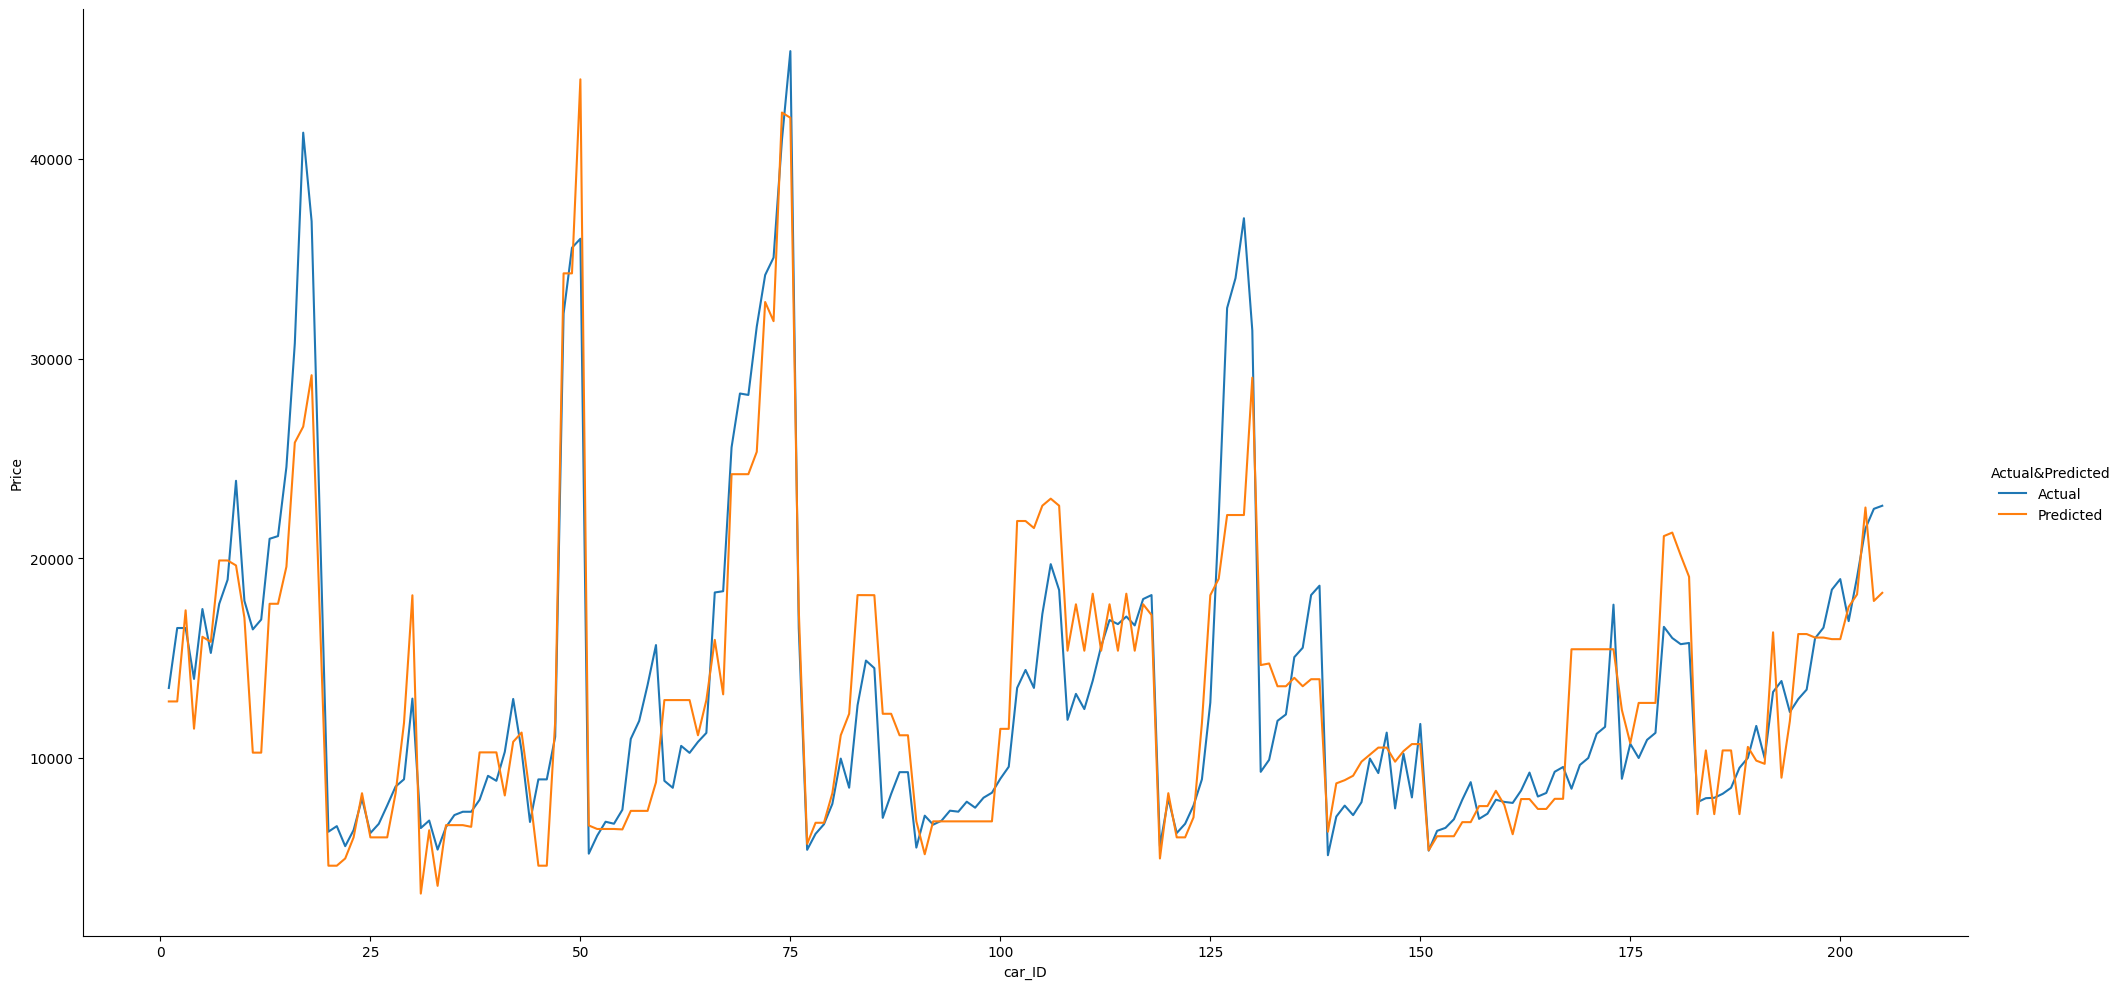

In [347]:
#Visualize actual and predicted values for each example in dataset
sns.relplot(data=df_melted, x=df_melted.index, y="Price", hue="Actual&Predicted",kind="line", height=10, aspect=2)

The plot provides a visual demonstration of the accuracy of our multiple linear regression model in predicting car prices. It appears that our model performs satisfactorily, despite the inherent inflexibility of linear models compared to non-linear ones. Nonetheless, it is important to remember that statistical and model metrics are the primary sources for evaluation as always.

## Uploading to AWS (example)

### Converting your model into a pickle file

In [348]:
#Convert your model into a pickle file
import pickle
# our model is saved as "results = model.fit()". This is why we write results' in following code script.
with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)


### Uploading the model and the dataset to company S3 environment

In [349]:
import boto3

# Create a session using your ACCESS_KEY, SECRET_KEY, and SESSION_TOKEN
session = boto3.Session(
    aws_access_key_id='my_access_key',
    aws_secret_access_key='super_secrey_key',
    aws_session_token='session_token_123',
)

# Create an S3 resource object using the above session
s3 = session.resource('s3')

# Define the bucket name
bucket_name = 'carsperian-market-price-analysis-2106'

#The file path in my local filesystem
dataset_path = 'C:\Users\nails\OneDrive\Masaüstü\Experian\car_price_data.csv'
model_path = 'results.pkl'

# Upload the dataset and the model to the S3 bucket
s3.meta.client.upload_file(dataset_path, bucket_name, dataset_path)
s3.meta.client.upload_file(model_path, bucket_name, model_path)


SyntaxError: ignored